In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from haversine import haversine

In [9]:
f_path = 'us_state_capitals.json'
cap = pd.read_json(f_path, orient='index')
cap.drop(index=['AK','HI'], inplace=True)

### To see the optimal number of clusters after all stages of expansion, we need to plot cost vs. # of clusters.

 - Lets assume cost of erecting one data center is among `[100,500,1000,2000, 4000, 8000, 10000]` units

In [10]:
from cluster import Cluster

In [11]:
df = pd.DataFrame({})
datacenter_cost=[100,500,1000,2000, 4000, 8000, 10000]

In [12]:
for cost in datacenter_cost:
    cost_list=[]
    for k_num in range(1,20): 
        c = Cluster(list(zip(cap.lat,cap.long)), num_new_centers=k_num)
        c.train(list(zip(cap.lat,cap.long)))
        c.cost()
        cost_list.append(c.total_cost + k_num*cost)
        del c
    df[cost]=cost_list

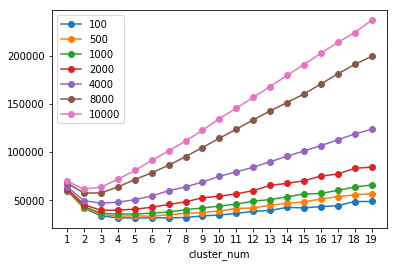

In [13]:
df['cluster_num']=df.index+1
df.plot(x='cluster_num', xticks=df['cluster_num'], style='-o')
plt.show()

## Observations
 - Total cost of connecting a retail store to a data center depends on
    - cost of connecting a retail store to data center
    - the total number of data centers
 - Hence the optimum number of data centers also depends on the same factors

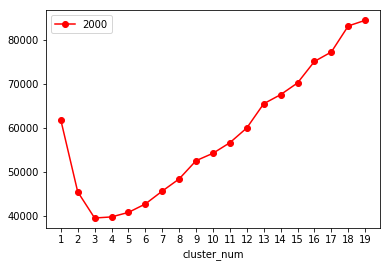

In [17]:
df.plot(x='cluster_num',y=2000, xticks=df['cluster_num'], style='-o', color= 'red')
plt.show()

> Here we fix the cost of setting-up one data center at 2000 units and will find out the optimal way of expansion

- the optimum number of data centers seems to be around 5 to 10, after which total cost escalates

